In [16]:
import pandas as pd

import warnings # Para remover warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

iris = pd.read_csv("Iris.csv") 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


![title](Petal-sepal.jpg)

In [37]:
# Conta quantos exemplos temos de cada especie
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

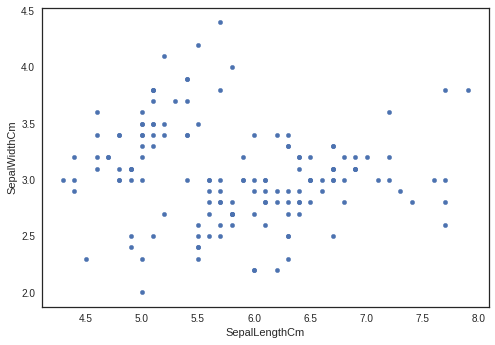

In [38]:
# Plotamos o comprimeto x largura da Sepal
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

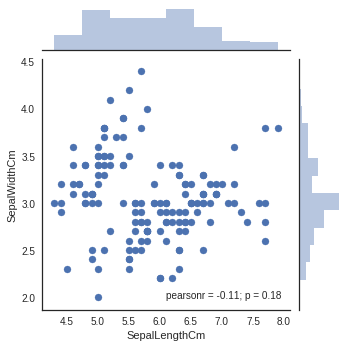

In [20]:
# Mesmo plot anterior mostrando junto o histrograma de distribuicao
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

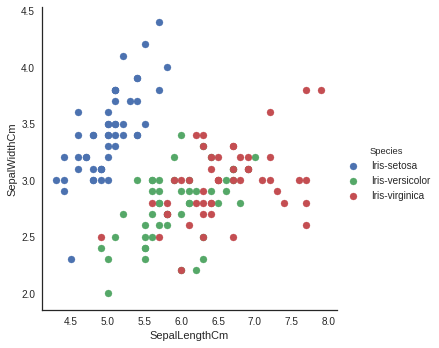

In [21]:
# Vou colorir cada ponto baseado na especie de cada planta.
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

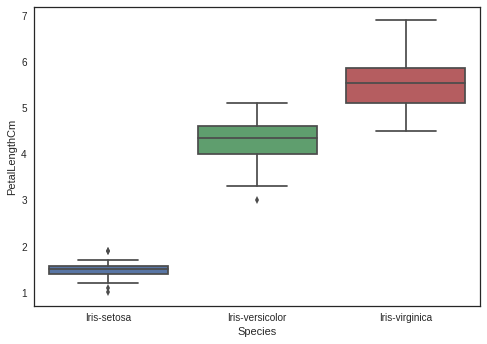

In [22]:
# Visualizamos individualmente as esperices baseado no comptrimento da petala. 
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

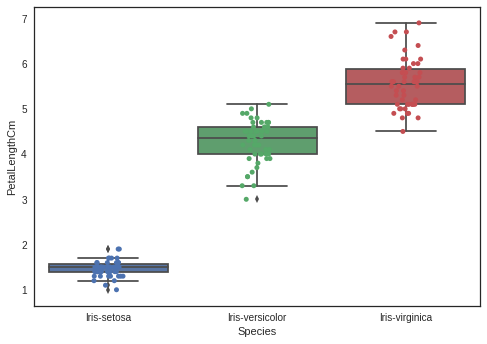

In [23]:
# Plotamos jutno com o bloxplot, a distribuicao de pontos.
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.show()

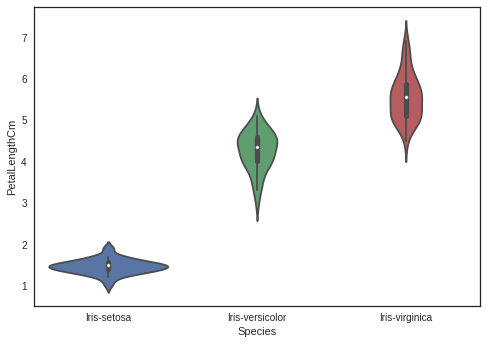

In [24]:
# Violin plot - mostra a densidade da distribuicao dos pontos
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
plt.show()

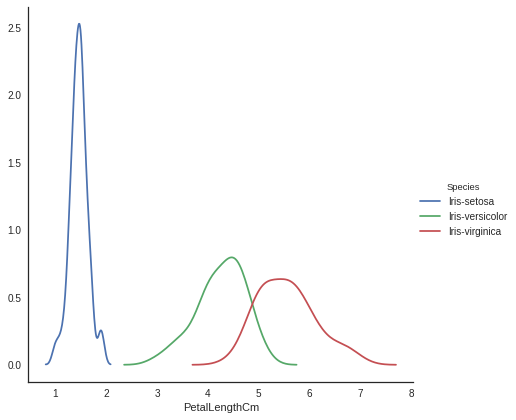

In [45]:
# Estimador de densidade de kernel, utilizandno kdeplot. 
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.show()

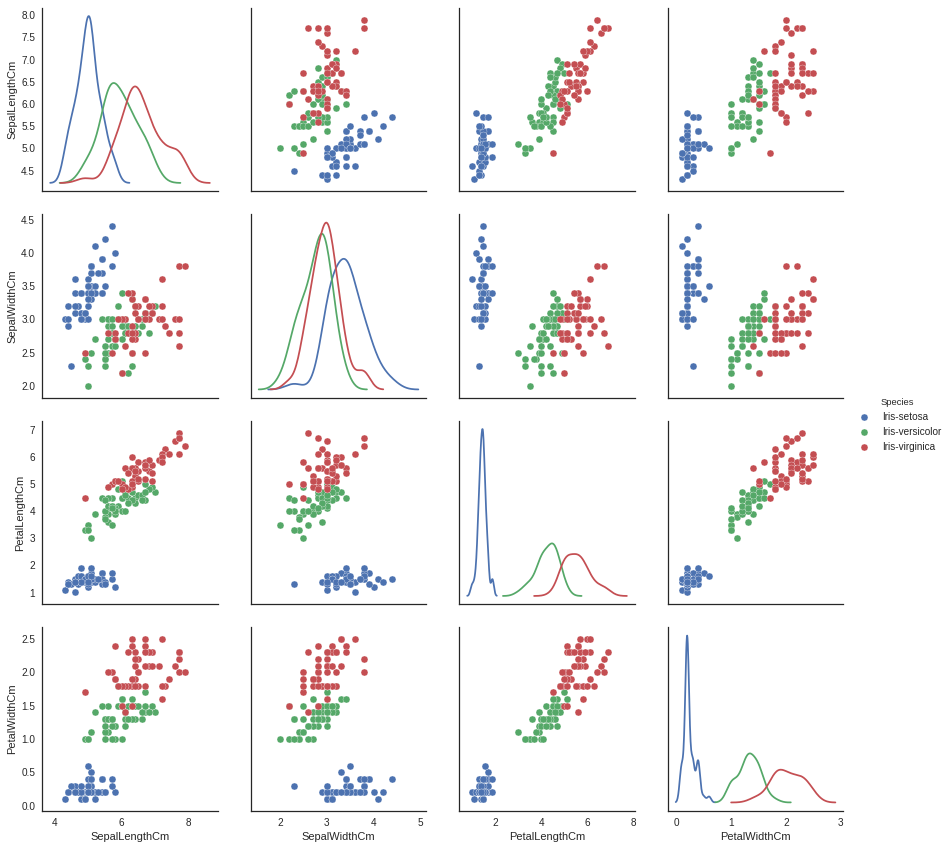

In [27]:
# Combinamos para cada atributo com todos os outros e mostramos a densidade de kernel na diagonal.
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")
plt.show()

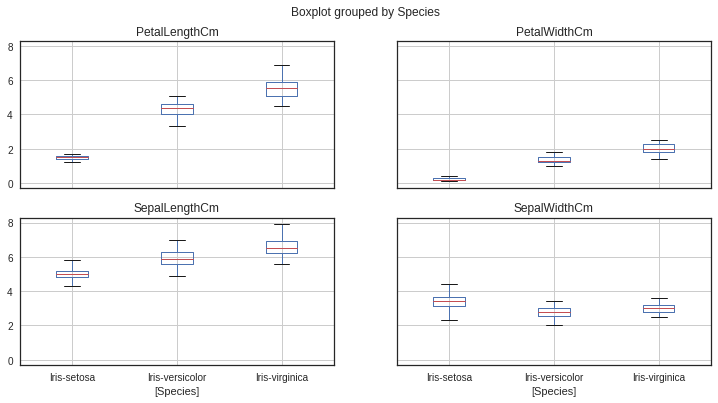

In [54]:
# boxplot para cada atributo
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))
plt.show()

In [58]:
import pandas as pd

# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
import numpy as np
from sklearn.cross_validation import train_test_split

# Formato desejado
X = np.array(df.ix[:, 0:4]) 
# Vetor alvo para treinamento.
y = np.array(df['class'])

# Divide em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# Instancia do modelo para (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting o modelo
knn.fit(X_train, y_train)

# Predicao
pred = knn.predict(X_test)

# Acuracia
print accuracy_score(y_test, pred)

1.0


In [77]:
#Descobrimos 
from sklearn.model_selection import cross_val_score

# Lista de valores de k
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# Lista de scores obtidos
cv_scores = []

# Aplica cross-validation - 10 folds
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Número ótimo de vizinhos é 7


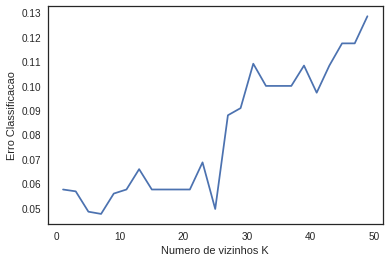

In [71]:
# Erro quadratico medio
MSE = [1 - x for x in cv_scores]

# Melhor valor de k
optimal_k = neighbors[MSE.index(min(MSE))]
print "Número ótimo de vizinhos é %d" % optimal_k

# plot erro por valor de k
plt.plot(neighbors, MSE)
plt.xlabel('Numero de vizinhos K')
plt.ylabel('Erro Classificacao')
plt.show()

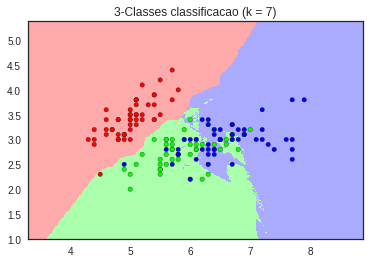

In [87]:
#Aplicamos para todo o conjunto com k_vizinhos = 7
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

#Sabendo que o melhor valor de k é 7
n_neighbors = 7

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02  

# Mapa de cor
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#for weights in ['uniform', 'distance']:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Classes classificacao (k = 7)")

plt.show()